<h1>Medical Data Vizualization using Pandas and Seaborn </h1>

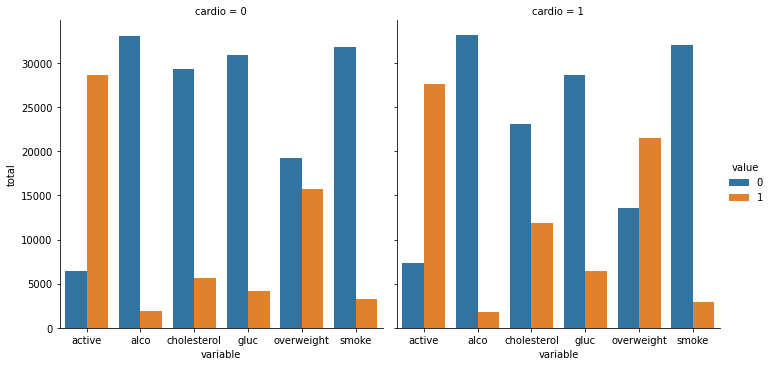

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Added 'overweight' column
df['overweight'] = 0
df['BMI'] = (df['weight'] // ((df['height'] / 100) ** 2))

def overweight(val):
    return 1 if val > 25 else 0

df['overweight'] = df['BMI'].apply(overweight)
df.drop(columns=['BMI'], inplace=True)

# Normalized data by making 0 always good and 1 always bad.
def normalize(val):
    return 0 if val == 1 else 1

df['cholesterol'] = df['cholesterol'].apply(normalize)
df['gluc'] = df['gluc'].apply(normalize)


# Draw Categorical Plot
def draw_cat_plot():
    # DataFrame for cat plot using the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active' and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # The data split by 'cardio'.
    df_cat["total"] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()

    fig = sns.catplot(x='variable', y='total', data=df_cat, hue='value', kind='bar', col='cardio')
    return fig

a = draw_cat_plot()

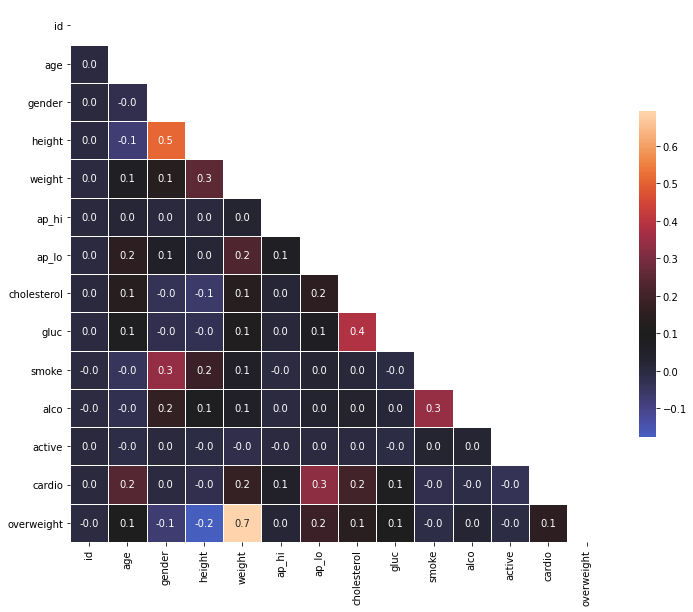

In [10]:
# Draw Heat Map
def draw_heat_map():
    # Cleaned data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (
                df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (
                             df['weight'] <= df['weight'].quantile(0.975))]

    # Calculated the correlation matrix
    corr = df_heat.corr(method='pearson')

    # Generated a mask for the upper triangle
    mask = np.triu(corr)

    # The matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # Drawing with seaborn'
    sns.heatmap(corr, linewidths=1,  mask=mask, fmt='.1f', center=0.1,
                cbar_kws={'shrink': 0.5}, annot=True, square=True,)
    return fig


b = draw_heat_map()
plt.show()